<a href="https://colab.research.google.com/github/koderlad/phishing-email-detection-colab/blob/main/Phishing_Email_Detection_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Table of Contents**
- [Introduction](#scrollTo=gzFCnQ2ZmcT9&line=-1&uniqifier=1)
- [Dataset](#scrollTo=uoTy8fHLp3RD&line=-1&uniqifier=1)
- [Project Objective](#scrollTo=OygTpoMzyctg&line=-1&uniqifier=1)
- [Project Methodology](#scrollTo=BuVgrpJo1TsP&line=-1&uniqifier=1)
- [Software Needed](#scrollTo=WPodql-XINOr&line=-1&uniqifier=1)
- [Loading Data and Importing Libraries](#scrollTo=W6EgibilIzBs&line=-1&uniqifier=1)
- [Exploratory Data Analysis](#scrollTo=cYSjYkMu_L0v&line=-1&uniqifier=1)
- [Data Cleaning](#scrollTo=aWNA5Qs1p2-J)
- [Feature Engineering](#scrollTo=ppvn3ObaGMUA&line=-1)
- [Training Intelligent Models](#scrollTo=kH-h88ylMFMj&line=-1&uniqifier=1)
- [Conclusion and Findings](#scrollTo=SLR6pO3E5icP&line=-1&uniqifier=1)

##**Introduction**
As many institutions such banks, online commerce, stocks have increasily relies on internet to provides it services to its customers, there has been an increase in digital frauds. Phishing is one of such frauds that users has become victims to quite often.

In many cases, these attackers make use of deciptive emails to target their victims by sending in links that asks for personal and financial details such as usernames, passwords, credit card details and such sensitive personal information. With these information, they proceed with financial theft or other frauds that creates a severe impact on the victims.

A major thing to do would be to make a system that can identify and ward users of the potential danger so that they don't fall as an easy victim and become more self aware of such threats.

##**Dataset**
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/subhajournal/phishingemails). This dataset contains a total of 18,650 records of labeled emails. The emails are either labeled as "Phishing Email" or "Safe Email" under the **Email Type** column.
It has two columns: Email Text and Email Type, where Email Text column contains the email body and Email Type contains the type of email whether "Phishing" or "Safe".

##**Project Objective**
The **main objective** of pursuing this project is to train and develop a machine learning model that predicts if an email is supicious or not by marking it as either "Phishing Email" or "Safe Email".

With this model, a user can be aware of the risks an email can possess even if it look familiar.

The **secondary objective** is to learn and practice skills like data wrangling, feature engineering, feature extraction and NLP practices to classify texts and work with machine learning algorithms to train and test the model.

##**Project Methodology**
This project has a 4-Step Process.
1. Dataset extraction: We selected the dataset from Kaggle.
2. Exploratory Data Analysis: We did this to understand the data and plan our model training approach.
3. Feature Engineering: We extracted features and implimented Natural Language Processing methods.
4. ML Prediction: Trained Machine Learning algorithm to create a prediction model.
5. Conlusion: We presented the project conclusion and findings.

##**Software Needed**
This project is done using Google Colab Notebook and by using Kagglehub package to download the dataset into the notebook itself via the kaggle api.

In [ ]:
# !pip install --upgrade kagglehub

##**Loading Data and Importing Required Libraries**

We used kagglehub package to download the data set from kaggle and the os package to get the directory name and file name to create a file path to access the dataset.

In [ ]:
#Importing Kagglehub and OS.
import kagglehub
import os

#Downloading dataset from Kaggle using kagglehub.
path = kagglehub.dataset_download("subhajournal/phishingemails")
file = None

#Using "os" package to get directory and file name and creating the file path
for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    file = os.path.join(dirname, filename)

100%|██████████| 18.0M/18.0M [00:00<00:00, 41.5MB/s]

Extracting files...


We imported the required packages as listed below:
- Pandas
- Numpy
- Matplotlib
- Seaborn
- NLTK
- Scikit Learn
- Regular Expression
- Python String Module
- Wordcloud

In [ ]:
#Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from wordcloud import WordCloud

nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We used **`read_csv()`** function from the Pandas library to read the CSV file from the path created above using the **os** package.

In [ ]:
#Reading CSV File using Pandas.
df_original = pd.read_csv(file, encoding="latin1")

In [ ]:
df_original.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


##**Exporatory Data Analysis**
To create a proper and effective machine learning model, it is important to understand the data. We conducted a series of exploratory analysis to understand how the data is distrubuted and what features can be added or should be removed.

We also used Matplotlib to understand the data visually, this helped us make sense of data in a more concise manner.

In [ ]:
#Making a copy of the origial Data Frame.
df_1 = df_original.copy()
df_1.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


###**Understanding Data**


In [ ]:
#Getting the number of rows and columns
df_1.shape

(18650, 3)

The dataset has 18650 records with three columns. From the .head() function, we can notice that there is one unnamed column, which only shows the index of the rows. We can drop that column from our dataset as it is not required.

In [ ]:
df_1.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [ ]:
df_1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_1.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


The unwanted column is dropped from the dataset.

###**Checking Unique Values in "Email Type" Column**
Checking for unique values to understand the values in the "Email Type" column and verifying it against the dataset description of having only two values, "Safe Email" and "Phishing Email".

In [ ]:
#Checking unique values in Email Type Column
df_1["Email Type"].unique()

array(['Safe Email', 'Phishing Email'], dtype=object)

The values are verified and only seems to have two expected values.

###**Check for Null/Empty and Duplicate records**

In [ ]:
df_1.isnull().sum()

,0
Email Text,16
Email Type,0


There are 16 rows with empty values in the "Email Text" column.

In [ ]:
null_rows = df_1[df_1.isnull().any(axis=1)]
print(null_rows["Email Type"].value_counts())

Email Type
Phishing Email    16
Name: count, dtype: int64


All the rows *(16 out of 16)* with empty "Email Text" was labelled as "Phishing Emails" which isn't true and would give a false impression to the model. Therefore, removing these rows with null values would be more plausible.

In [ ]:
df_1.dropna(inplace=True)
df_1.shape

(18634, 2)

In [ ]:
#Checking for duplicate values in the dataset
df_1.duplicated().sum()

1096

Total number of duplicated values are 1096.

In [ ]:
df_1.drop_duplicates(inplace=True)
df_1.shape

(17538, 2)

####**Simplifying the column name**
Renaming the column names to simple names to make it easy to access.

In [ ]:
#Updating the data columns. This codes need to be run only once.
df_1.rename(columns={'Email Text': 'text', 'Email Type': 'label'}, inplace=True)
df_1.head()

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


####**Data Visualization**


Using Bar Graph to understand how the email labels are distributed in this cleaned dataset.

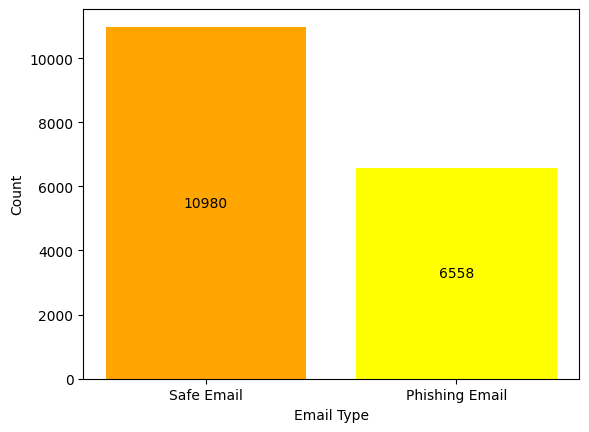

In [ ]:
#Initializing matplotlib
fig, ax = plt.subplots()
ax.bar_label(ax.bar(df_1['label'].value_counts().index, df_1['label'].value_counts().values, color=['orange', '#ffff00']), label_type='center')
ax.set_xlabel('Email Type')
ax.set_ylabel('Count')
plt.show()

###**Word Repetition**
We used the word cloud to see measure the frequency of words occuring in each type of emails.

In [ ]:
#Creating Word Cloud to check the most repeated words in the emails marked as Phishing
def word_cloud_email(data, label):
  email_data = data[data['label'] == label]
  texts = " ".join(email_data['text'])

  word_cloud = WordCloud(width=1000,height=800, background_color='white').generate(texts)

  #Plot the Word Cloud
  plt.figure(figsize=(15,8))
  plt.title(f"Top Words in {label}.")
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

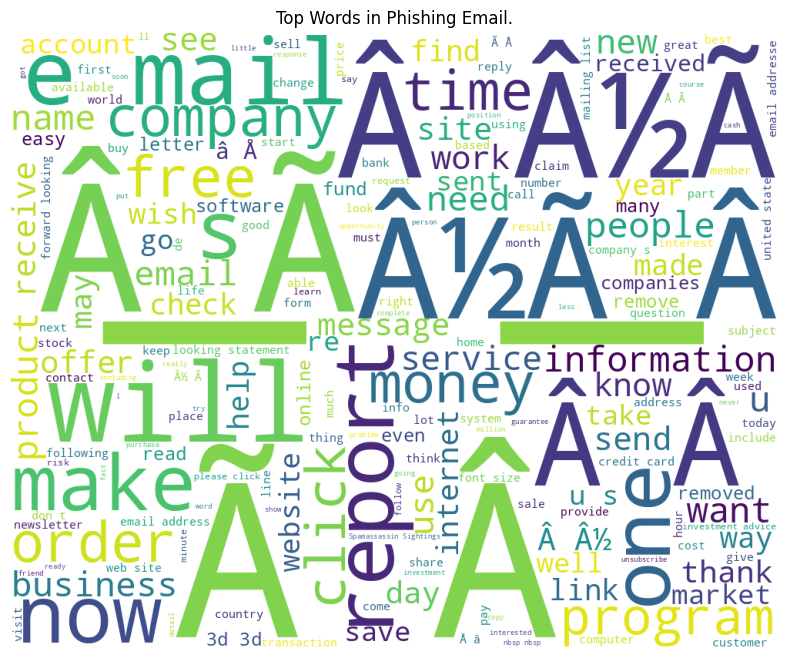

In [ ]:
#Word Cloud for Phishing Emails
word_cloud_email(df_1, 'Phishing Email')

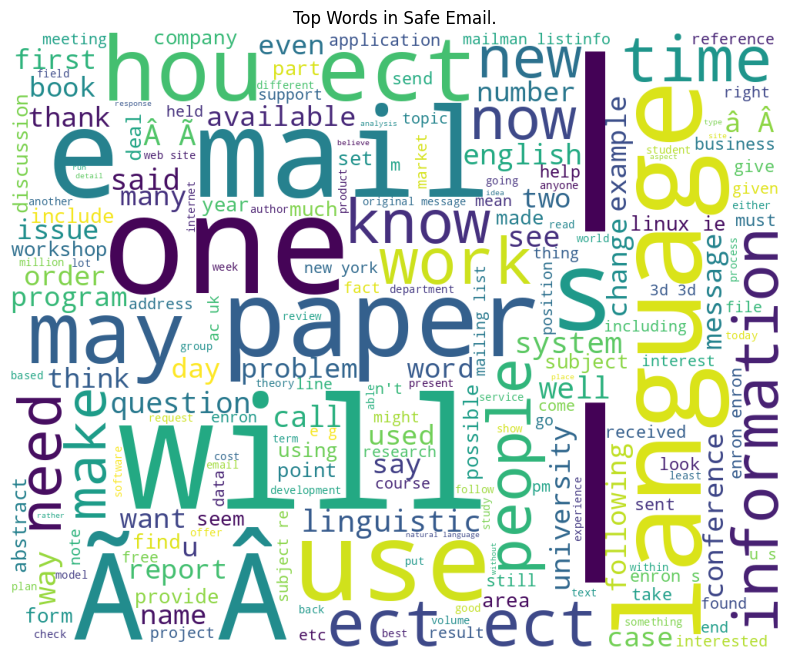

In [ ]:
#Word Cloud for Safe Emails
word_cloud_email(df_1, 'Safe Email')

We can see that the common words in the emails that are marked as phising are: A with a symbol on the head, free, Fractions like 1/2, etc.

###**Emails with Hyperlinks**
We counted the records with hyperlinks and compared how the data was distributed.

In [ ]:
#CODE TO FIND RECORDS WITH HYPERLINKS AND COUNT THE LABELS OCCURING
def check_hyperlink(data):
  if not isinstance(data, str):
    data = str(data)

  hyperlink = re.match(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', data)
  return bool(hyperlink)

df_1['has_hyperlink'] = df_1['text'].apply(check_hyperlink)
df_1['has_hyperlink'].value_counts()
filtered_df=df_1[df_1['has_hyperlink']]
filtered_df['label'].value_counts()

,count
label,
Safe Email,71
Phishing Email,1


The difference in count is large and significant, there this feature can be excluded as it will have little to no impact on the prediction result due to it's distribution disparity.

Therefore, an email can be considered phishing regardless of the presence of hyperlink. This also adds to the thought process of removing hyperlinks from the data during the data-cleaning stage.

[Update: Removed the "has_hyperlink" column from the data frame after observing the results.]

In [ ]:
df_1.drop('has_hyperlink', axis=1, inplace=True)
df_1.head()

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


##**Cleaning Data**
Cleaning Data: Removing extra spaces, removing hyperlinks, removing punctuations, Converting to lowercase.

Doing the cleaning before adding features to the dataset, because some hyperlinks would have unnecessary space characters that would increase the length of the text.

In [ ]:
#A function to handle the data cleaning.
def data_cleaning(data):
  #Convert to string if not already: To prevent string expectation error.
  if not isinstance(data, str):
    data = str(data)

  #Removing Hyperlink
  data = re.sub(r'http\S+', '', data)

  #Removing punctuations
  data = re.sub(r'[^\w\s]', '', data)

  #Convert to lowercase
  data = data.lower()

  #Removing numbers
  data = re.sub(r'\d', '', data)

  #Removing extra spaces
  data = re.sub(r'\s+', ' ', data).strip()

  return data

In [ ]:
df_1['text'] = df_1['text'].apply(data_cleaning)

##**Feature Engineering**
Adding the length feature as an additional to the existing data frame. The reason to do this before pre-processing with NLP techniques is to capture the length in its raw format.

In [ ]:
df_1["length"] = df_1['text'].apply(len)

In [ ]:
df_1['length'].describe()

,length
count,1.753800e+04
mean,2.448290e+03
std,1.099648e+05
min,0.000000e+00
25%,3.590000e+02
50%,7.580000e+02
75%,1.632500e+03
max,1.455632e+07


From this statistical analysis, we can see that the parity among data is large therefore a need for normalization is evitable.

In [ ]:
df_1.head()

,text,label,length
0,re disc uniformitarianism re sex lang dick hud...,Safe Email,905
1,the other side of galicismos galicismo is a sp...,Safe Email,443
2,re equistar deal tickets are you still availab...,Safe Email,964
3,hello i am your hot lil horny toy i am the one...,Phishing Email,504
4,software at incredibly low prices lower draper...,Phishing Email,384


####**Pre-Processing Data with NLP**
After data cleaning, we processed our new data with PorterStemmer to find the stem words or root words for the ones present in our dataframe and also used list comprehension method to check for stopwords and remove it from the data.

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#NLP Pre-Processing
def stemming_stopwords_removal(data):
  stemmer = PorterStemmer()
  data = [stemmer.stem(word) for word in data.split() if word not in words]
  return ' '.join(data)

In [ ]:
df_1['text'] = df_1['text'].apply(stemming_stopwords_removal)

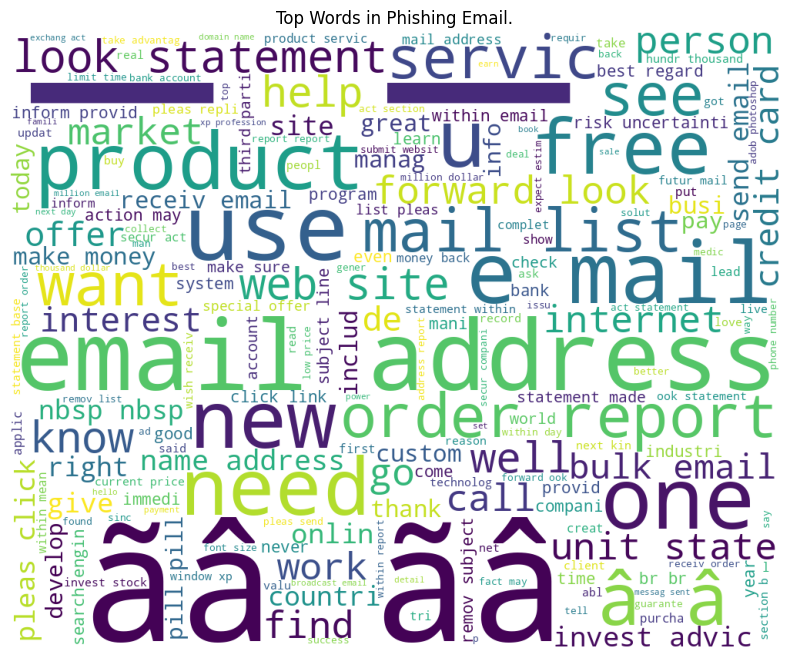

In [ ]:
#Word Cloud after NLP Pre Processing
word_cloud_email(df_1, 'Phishing Email')

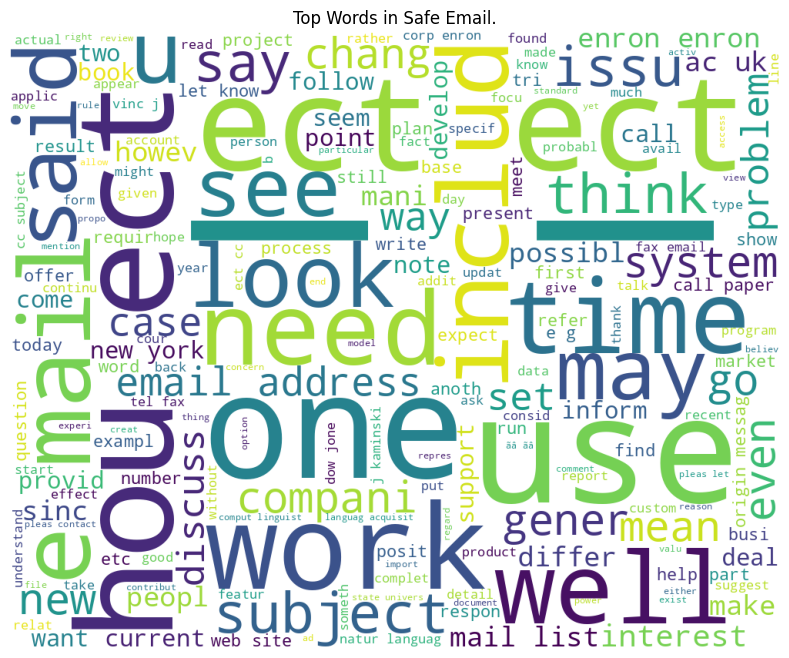

In [ ]:
word_cloud_email(df_1, 'Safe Email')

If we compare this word cloud with the previous ones, we can see that there have been few changes in the word repetition.

#### **Training Intelligent Models**

Column Transformers to transform multiple columns in a single pipeline to fit the model. Using data standardization method in the length column to reduce the range of the length.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
tf = TfidfVectorizer(stop_words="english", max_features=10000, sublinear_tf=True, analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), min_df=5)
feature_x = tf.fit_transform(df_1['text'])

In [ ]:
print(feature_x)

  (0, 2316)	0.14657599543056837
  (0, 7955)	0.11362444250349908
  (0, 4711)	0.14066456886632064
  (0, 2270)	0.144177982567471
  (0, 3983)	0.16553163221883035
  (0, 6030)	0.1247036343830412
  (0, 9355)	0.11182724459818828
  (0, 8594)	0.08280256827277213
  (0, 3028)	0.12674675549753672
  (0, 627)	0.13475724141397102
  (0, 8182)	0.3359097457606002
  (0, 9055)	0.1147949633619268
  (0, 4914)	0.11912971732914819
  (0, 7891)	0.24460549329081313
  (0, 7322)	0.227755014212024
  (0, 8847)	0.07887879366021804
  (0, 5987)	0.10262622694943305
  (0, 5937)	0.10283537244741217
  (0, 1050)	0.23111887049099392
  (0, 9617)	0.0694977493406126
  (0, 3741)	0.09344286616369643
  (0, 4065)	0.1950890190231274
  (0, 5773)	0.14716242012425648
  (0, 1426)	0.10681617543088338
  (0, 1660)	0.1452130674336065
  :	:
  (17536, 6807)	0.1538916770251235
  (17536, 589)	0.18528230814001687
  (17536, 6494)	0.12328053032988669
  (17536, 2748)	0.13601434820112698
  (17536, 9441)	0.1538916770251235
  (17536, 8412)	0.1394856974

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('text', TfidfVectorizer(stop_words="english", max_features=10000, sublinear_tf=True, analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), min_df=5), 'text'),
        ('length', StandardScaler(), ['length'])
    ]
)

####**Splitting Train and Test Data**
Since our data is now cleaned, it's time to split train and test data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_1[['text', 'length']], df_1['label'], test_size=0.2, random_state=42)

####**Training Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

def select_text_features(X):
    return X[:, :10000]  # Assuming 10000 max_features for TfidfVectorizer

def select_length_feature(X):
    return X[:, 10000:]  # Select the length feature

log_reg = LogisticRegression()

vectorizer = TfidfVectorizer()

#Creating Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('features', FeatureUnion([
        ('text_features', Pipeline([
            ('selector', FunctionTransformer(select_text_features, validate=False)),
            ('chi', SelectKBest(chi2, k=10000))
        ])),
        ('length_feature', Pipeline([
            ('selector', FunctionTransformer(select_length_feature, validate=False)),
        ]))
    ])),
    ('clf', log_reg)
])

#Training Model
model = pipeline.fit(X_train, Y_train)

####**Training Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
training_prediction = model.predict(X_train)
print(accuracy_score(Y_train, training_prediction))

0.9878831076265147


####**Test Accuracy**

In [ ]:
test_prediction = model.predict(X_test)
print(accuracy_score(Y_test, test_prediction))

0.975769669327252


#### **Measuring Model Performance**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, test_prediction)

In [ ]:
print(classification_report(Y_test, test_prediction))
print(cm)

                precision    recall  f1-score   support

Phishing Email       0.97      0.96      0.97      1295
    Safe Email       0.98      0.98      0.98      2213

      accuracy                           0.98      3508
     macro avg       0.98      0.97      0.97      3508
  weighted avg       0.98      0.98      0.98      3508

[[1244   51]
 [  34 2179]]


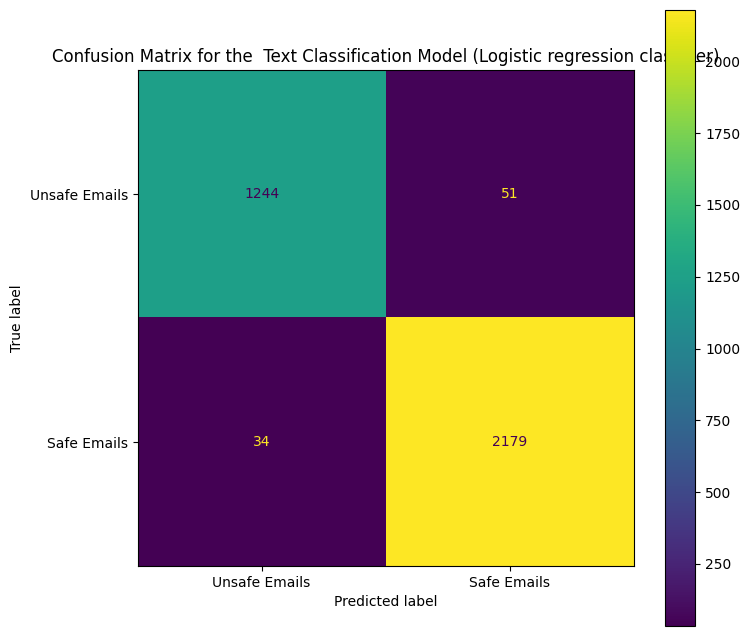

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Unsafe Emails', "Safe Emails"]
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model (Logistic regression classifier)')
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

#### **Understanding Confusion Matrix and Classification Report**
The model has a precision values for Unsafe and Safe Emails as 97% and 98%, respectively. With these numbers it is clear that the model has high accuracy in predicting the safety of emails, while performing better to identify safe emails. <br/>

The Recall value means that it is accruately predicting emails that is truly safe and unsafe emails as 96% and 98%, this also indicates that it is better at identify safer emails betters. <br/>

In [ ]:
loss = log_loss(Y_test, model.predict_proba(X_test))
print("Model Loss: ", loss)

Model Loss:  0.11741388271393398


### **Conclusion and Key Findings**

1. With this analysis, we have found that emails with hyperlink does not necessarily mean the email being a "Phishing Email".
2. We can notice that words used in "Phishing Emails" have *spelling mistakes*, *the letter "a" with a symbol is mostly repeated* and words that are enticing such as "**free**" are mostly repeated *italicized text*.
3. The Model has high accuracy with **97.5%** accuracy in its prediction, but with the log loss of **0.117**, it also shows that it is confident in its prediction as the log loss is closer to **0**. <br/>

Since identifying unsafe email would be more critical for the users, we can improve upon the model by making the dataset more balanced. One reason for the model performing well to identify safe emails could be because the dataset for emails marked as "Safe Emails" were significantly higher, almost being double the size of "Unsafe Emails". <br/>

One thing I would want to do to further analyze this data is to compare the statistical values of dataset for the length of the email of both safe and unsafe emails and to compare which emails are generally longer.